# Data Wrangling
- `pandas`
- Where to find data?
    - Web Scraping & APIs

<center>
<img src="https://raw.githubusercontent.com/COGS108/Lectures-Wi22/main/02_python/img/pandas.png" alt="pandas" width="600px">
</center>



Pandas is a Python library for managing heterogenous data.

At its core, Pandas is used for the **DataFrame** object, which is:

    - a data structure for labeled rows and columns of data
    - associated methods and ultlites for working with data.
    - each column contains a `pandas` **Series**

# Setup

In [2]:
# Import standard libraries
import pandas as pd
import numpy as np

# Loading Data

In [3]:
# Load a csv file of data
df = pd.read_csv('https://raw.githubusercontent.com/COGS108/Lectures-Wi22/main/02_python/data/my_data.csv')

In [4]:
# Check out a few of the first rows of the dataframe
df.head()

,id,first_name,last_name,age,score,value
0,295,Andrea,Clark,46,-1,24547.87
1,620,Bill,Woods,46,492,46713.90
2,891,Alexander,Jacobson,48,489,32071.74
3,914,Derrick,Bradley,52,-1,30650.48
4,1736,Allison,Thomas,44,-1,9553.12


In [5]:
# Check out a few of the last rows of the dataframe
df.tail()

,id,first_name,last_name,age,score,value
195,97441,Krista,Ortiz,34,-1,24074.79
196,97728,Anna,Chambers,37,598,0.00
197,98115,Jennifer,Pitts,29,606,6876.75
198,98284,Brittany,Jenkins,34,665,43525.88
199,98366,Katelyn,Brown,45,501,29668.38


Pandas DataFrame:
- Index for each row
- Column name for each column (Series)
- Stores heterogenous types

# Slicing

In [6]:
# Slicing (Indexing): select a Series (column) using its name
df['first_name']

0         Andrea
1           Bill
2      Alexander
3        Derrick
4        Allison
         ...    
195       Krista
196         Anna
197     Jennifer
198     Brittany
199      Katelyn
Name: first_name, Length: 200, dtype: object

In [7]:
# Slicing (Indexing): select a Series (column) using an row index
df.loc[0]

id                 295
first_name      Andrea
last_name        Clark
age                 46
score               -1
value         24547.87
Name: 0, dtype: object

In [8]:
# Changing the row indexs into the passed in argument
# df.set_index('first_name')

In [9]:
# Slicing (Indexing): select a Series (column) using a changed row index
# df.set_index('first_name').loc['Andrea']

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
type(df['last_name'])

pandas.core.series.Series

In [12]:
# Slicing: select a row & column with 'loc'
df.loc[1, 'score'] # Row: 1, Series: Score

492

In [13]:
# To get a subset of all of those who is older then 60
df[df['age'] > 60]

,id,first_name,last_name,age,score,value
8,2635,David,Coleman,68,351,66035.28
22,13120,Daniel,Key,64,165,17444.32
39,22584,Kenneth,Johnson,65,-1,50174.14
51,27225,Dennis,Mason,62,622,105449.11
53,29566,James,Kennedy,69,224,NaN
54,29868,Jason,Bentley,69,343,60605.08
85,47669,Michael,Cowan,61,263,16167.90
89,50960,Maxwell,Mcbride,63,347,105598.79
94,52428,Bryan,Barnett,64,445,59795.50
109,58794,Jared,Brown,61,731,51968.96


In [14]:
# Returns a boolean df 
df['age'] > 35

0       True
1       True
2       True
3       True
4       True
       ...  
195    False
196     True
197    False
198    False
199     True
Name: age, Length: 200, dtype: bool

# Checking out the DataFrame

In [15]:
# Check how large our dataframe is
df.shape # Prints out (ROWS, COLUMNS [SERIES])

(200, 6)

In [16]:
# Check what columns we have in our DataFrame
df.columns

Index(['id', 'first_name', 'last_name', 'age', 'score', 'value'], dtype='object')

In [17]:
# Check the datatypes of our variables
df.dtypes

id              int64
first_name     object
last_name      object
age             int64
score           int64
value         float64
dtype: object

# Exploring the data
- quantitative (numbers)
- qualitative (categorical)
- basic descriptive statistics

In [18]:
# Checking categorical data
df['first_name'].value_counts()

David       6
Michael     5
Eric        4
Charles     4
James       4
           ..
Alison      1
Andrew      1
Vanessa     1
Samantha    1
Katelyn     1
Name: first_name, Length: 134, dtype: int64

In [19]:
# Checking categorical data from the 4th index to second to last
df['first_name'].value_counts()[4:-2]

James        4
Elizabeth    3
Ashley       3
Jonathan     3
Sarah        3
            ..
Candace      1
Kristin      1
Alison       1
Andrew       1
Vanessa      1
Name: first_name, Length: 128, dtype: int64

In [20]:
# Check a particualr descriptive statistic
df['value'].std() # Standard diviation

32493.94574115322

In [21]:
# Describe a particular column
df['value'].describe() # runs different math methods

count       189.000000
mean      28730.336296
std       32493.945741
min           0.000000
25%        9593.030000
50%       17976.510000
75%       33163.310000
max      204999.960000
Name: value, dtype: float64

In [22]:
# Get descriptive statistics of all numerical columns
df.describe()

,id,age,score,value
count,200.000000,200.000000,200.000000,189.000000
mean,52929.150000,46.020000,416.595000,28730.336296
std,29414.298899,10.028582,237.176674,32493.945741
min,295.000000,14.000000,-1.000000,0.000000
25%,26709.500000,39.000000,288.750000,9593.030000
50%,54643.500000,46.000000,463.500000,17976.510000
75%,80840.750000,53.000000,596.500000,33163.310000
max,98366.000000,69.000000,942.000000,204999.960000


In [23]:
df['age'].describe()

count    200.000000
mean      46.020000
std       10.028582
min       14.000000
25%       39.000000
50%       46.000000
75%       53.000000
max       69.000000
Name: age, dtype: float64

In [24]:
df['age'].mean()

46.02

## `pandas`: Common Manipulations

You'll want to be *very* familiar with a few common data manipulations when wrangling data, each of which is described below:

Manipulation | Description
-------|------------
**select** | select which columns to include in dataset
**filter** | filter dataset to only include specified rows
**mutate** | add a new column based on values in other columns
**groupby** | group values to apply a function within the specified groups
**summarize** | calculate specified summary metric of a specified variable
**arrange** | sort rows ascending or descending order of a specified column
**merge** | join separate datasets into a single dataset based on a common column

# Selecting & Dropping Columns
- include subset of columns of larger data frame

In [25]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [26]:
df.head()

,id,first_name,last_name,age,score,value
0,295,Andrea,Clark,46,-1,24547.87
1,620,Bill,Woods,46,492,46713.90
2,891,Alexander,Jacobson,48,489,32071.74
3,914,Derrick,Bradley,52,-1,30650.48
4,1736,Allison,Thomas,44,-1,9553.12


In [27]:
# Specify which columns to include
select_df = df[['id', 'age', 'score', 'value']]
select_df.head()

,id,age,score,value
0,295,46,-1,24547.87
1,620,46,492,46713.90
2,891,48,489,32071.74
3,914,52,-1,30650.48
4,1736,44,-1,9553.12


In [28]:
# Drop columns we don't want
df = df.drop(labels=['first_name', 'last_name'], axis=1)

In [29]:
df

,id,age,score,value
0,295,46,-1,24547.87
1,620,46,492,46713.90
2,891,48,489,32071.74
3,914,52,-1,30650.48
4,1736,44,-1,9553.12
...,...,...,...,...
195,97441,34,-1,24074.79
196,97728,37,598,0.00
197,98115,29,606,6876.75
198,98284,34,665,43525.88


In [30]:
df.drop?

Signature:
df.drop(
    labels=None,
    axis: 'Axis' = 0,
    index=None,
    columns=None,
    level: 'Level | None' = None,
    inplace: 'bool' = False,
    errors: 'str' = 'raise',
)
Docstring:
Drop specified labels from rows or columns.

Remove rows or columns by specifying label names and corresponding
axis, or by specifying directly index or column names. When using a
multi-index, labels on different levels can be removed by specifying
the level. See the `user guide <advanced.shown_levels>`
for more information about the now unused levels.

Parameters
----------
labels : single label or list-like
    Index or column labels to drop.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Whether to drop labels from the index (0 or 'index') or
    columns (1 or 'columns').
index : single label or list-like
    Alternative to specifying axis (``labels, axis=0``
    is equivalent to ``index=labels``).
columns : single label or list-like
    Alternative to specifying axis (``labels, axi

In [36]:
df.drop?

Signature:
df.drop(
    labels=None,
    axis: 'Axis' = 0,
    index=None,
    columns=None,
    level: 'Level | None' = None,
    inplace: 'bool' = False,
    errors: 'str' = 'raise',
)
Docstring:
Drop specified labels from rows or columns.

Remove rows or columns by specifying label names and corresponding
axis, or by specifying directly index or column names. When using a
multi-index, labels on different levels can be removed by specifying
the level. See the `user guide <advanced.shown_levels>`
for more information about the now unused levels.

Parameters
----------
labels : single label or list-like
    Index or column labels to drop.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Whether to drop labels from the index (0 or 'index') or
    columns (1 or 'columns').
index : single label or list-like
    Alternative to specifying axis (``labels, axis=0``
    is equivalent to ``index=labels``).
columns : single label or list-like
    Alternative to specifying axis (``labels, axi

In [34]:
# Check out the DataFrame after dropping some columns
df.head()

,id,age,score,value
0,295,46,-1,24547.87
1,620,46,492,46713.90
2,891,48,489,32071.74
3,914,52,-1,30650.48
4,1736,44,-1,9553.12


## Filtering Data (slicing)
- include a subset (slice) of rows from larger data frame

In [37]:
# Check if we have any data from people below the age of 18
sum(df['age'] < 18)

1

In [38]:
df

,id,age,score,value
0,295,46,-1,24547.87
1,620,46,492,46713.90
2,891,48,489,32071.74
3,914,52,-1,30650.48
4,1736,44,-1,9553.12
...,...,...,...,...
195,97441,34,-1,24074.79
196,97728,37,598,0.00
197,98115,29,606,6876.75
198,98284,34,665,43525.88


In [39]:
# Select only participants who are 18 or older
df = df[df['age'] >= 18]
df.shape

(199, 4)

## Missing Data (NaNs)

In [40]:
# Check for missing values
df['value'].hasnans

True

In [41]:
df.isnull?

Signature: df.isnull() -> 'DataFrame'
Docstring:
Detect missing values.

Return a boolean same-sized object indicating if the values are NA.
NA values, such as None or :attr:`numpy.NaN`, gets mapped to True
values.
Everything else gets mapped to False values. Characters such as empty
strings ``''`` or :attr:`numpy.inf` are not considered NA values
(unless you set ``pandas.options.mode.use_inf_as_na = True``).

Returns
-------
DataFrame
    Mask of bool values for each element in DataFrame that
    indicates whether an element is an NA value.

See Also
--------
DataFrame.isnull : Alias of isna.
DataFrame.notna : Boolean inverse of isna.
DataFrame.dropna : Omit axes labels with missing values.
isna : Top-level isna.

Examples
--------
Show which entries in a DataFrame are NA.

>>> df = pd.DataFrame(dict(age=[5, 6, np.NaN],
...                    born=[pd.NaT, pd.Timestamp('1939-05-27'),
...                          pd.Timestamp('1940-04-25')],
...                    name=['Alfred', 'Batm

In [42]:
# Note in class
# Can operate on entire dataframe
df.isnull()

,id,age,score,value
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [43]:
# Note in class
# Equivalent
df['value'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: value, Length: 199, dtype: bool

In [44]:
# Check for null values
sum(df['value'].isnull())

11

In [45]:
# Have a look at the missing values
df[df['value'].isnull()]

,id,age,score,value
17,10753,58,335,NaN
30,16263,42,323,NaN
44,24952,51,399,NaN
48,26091,44,620,NaN
53,29566,69,224,NaN
63,35466,55,483,NaN
76,42138,28,543,NaN
90,51723,40,443,NaN
103,55821,41,709,NaN
114,61534,39,598,NaN


## Dealing with Missing Data - NaNs

In [48]:
# Dealing with null values: Drop rows with missing data
df = df.dropna()
df

,id,age,score,value
0,295,46,-1,24547.87
1,620,46,492,46713.90
2,891,48,489,32071.74
3,914,52,-1,30650.48
4,1736,44,-1,9553.12
...,...,...,...,...
195,97441,34,-1,24074.79
196,97728,37,598,0.00
197,98115,29,606,6876.75
198,98284,34,665,43525.88


## Finding Missing Data - Bad Values

In [49]:
# Check for the properties of specific columns
df['score'].describe()

count    188.000000
mean     414.329787
std      238.923293
min       -1.000000
25%      287.000000
50%      463.500000
75%      589.250000
max      942.000000
Name: score, dtype: float64

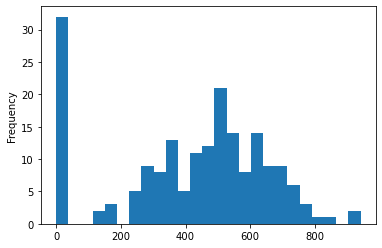

In [50]:
# Check the plot of the data for score to see the distribution
df['score'].plot(kind='hist', bins=25);

## Dealing with Missing Data - Bad Values

In [51]:
# Look for how many values have a -1 value in 'score'
sum(df['score'] == -1)

32

In [52]:
# Drop any row with -1 value in 'score'
df = df[df['score'] != -1]
df.shape

(156, 4)

## Creating new columns (mutating)
- `assign` can be very helpful in adding a new column
- lambda functions can be used to carry out calculations

In [ ]:
# convert age in years to age in (approximate) days
df = df.assign(age_days = df['age'] * 365)
df.head()

In [53]:
df['age_months'] = df['age'] * 12
df.head()

/var/folders/ls/jh6mx5jn7sjbmllgcw50cmt00000gn/T/ipykernel_1809/2195627687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_months'] = df['age'] * 12


,id,age,score,value,age_months
1,620,46,492,46713.90,552
2,891,48,489,32071.74,576
5,2049,57,333,138936.92,684
7,2607,50,536,9367.27,600
8,2635,68,351,66035.28,816


## Grouping & Summarizing
- group by a particular variable
- calculate summary statistics/metrics within group

In [54]:
df.age.value_counts()

52    10
53     9
44     8
46     7
47     7
45     6
48     6
39     6
34     6
57     6
43     5
42     5
54     5
49     5
60     4
50     4
37     4
41     4
56     4
51     4
36     3
32     3
64     3
28     3
31     3
29     3
35     3
38     3
27     2
58     2
68     2
40     2
61     2
33     1
55     1
63     1
69     1
62     1
59     1
23     1
Name: age, dtype: int64

In [55]:
# Calculate average within each age
df.groupby('age').agg('mean')

,id,score,value,age_months
age,,,,
23,81282.000000,775.000000,9116.030000,276.0
27,43311.000000,674.500000,10920.255000,324.0
28,79935.333333,820.000000,16190.663333,336.0
29,67990.333333,539.000000,5366.800000,348.0
31,51448.333333,335.666667,5485.036667,372.0
32,57812.333333,570.000000,11230.650000,384.0
33,20708.000000,750.000000,6984.920000,396.0
34,62912.833333,621.500000,20480.336667,408.0
35,47825.000000,614.666667,27419.950000,420.0


In [ ]:
# Cacluate average within each age
df.groupby('age').agg('mean')

## Sorting Rows (arrange)
- Specify order in which to display rows

In [ ]:
df.head()

In [56]:
# Sort by values in age
df = df.sort_values(by=['age'], ascending=False)
df.head()

,id,age,score,value,age_months
54,29868,69,343,60605.08,828
8,2635,68,351,66035.28,816
125,67135,68,343,30993.97,816
22,13120,64,165,17444.32,768
177,89922,64,282,161540.81,768


# Combining datasets

In [57]:
## Create two DataFrames
left = pd.DataFrame({'key': ['A', 'B', 'C', 'D'], 'value': np.random.randn(4)})    
right = pd.DataFrame({'key': ['B', 'D', 'E', 'F'], 'value': np.random.randn(4)})

In [58]:
left

,key,value
0,A,-0.663380
1,B,-0.327174
2,C,1.059876
3,D,-0.029741


In [59]:
right

,key,value
0,B,-0.174865
1,D,-0.596932
2,E,-0.257611
3,F,-0.107574


In [60]:
left.merge?

Signature:
left.merge(
    right: 'FrameOrSeriesUnion',
    how: 'str' = 'inner',
    on: 'IndexLabel | None' = None,
    left_on: 'IndexLabel | None' = None,
    right_on: 'IndexLabel | None' = None,
    left_index: 'bool' = False,
    right_index: 'bool' = False,
    sort: 'bool' = False,
    suffixes: 'Suffixes' = ('_x', '_y'),
    copy: 'bool' = True,
    indicator: 'bool' = False,
    validate: 'str | None' = None,
) -> 'DataFrame'
Docstring:
Merge DataFrame or named Series objects with a database-style join.

A named Series object is treated as a DataFrame with a single named column.

The join is done on columns or indexes. If joining columns on
columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
on indexes or indexes on a column or columns, the index will be passed on.
When performing a cross merge, no column specifications to merge on are
allowed.

Parameters
----------
right : DataFrame or named Series
    Object to merge with.
how : {'left', 'right'

In [61]:
left.merge(right, on='key')

,key,value_x,value_y
0,B,-0.327174,-0.174865
1,D,-0.029741,-0.596932


In [62]:
# Inner merge by default
pd.merge(left, right, on='key')

,key,value_x,value_y
0,B,-0.327174,-0.174865
1,D,-0.029741,-0.596932


In [63]:
# Same as above
pd.merge(left, right, on='key', how='inner')

,key,value_x,value_y
0,B,-0.327174,-0.174865
1,D,-0.029741,-0.596932


In [ ]:
# Right merge
pd.merge(left, right, on='key', how='right')

In [ ]:
# Left merge
pd.merge(left, right, on='key', how='left')

In [ ]:
# Outer join
pd.merge(left, right, on='key', how='outer')

## Visualizing Data
- We'll have a whole lecture (or two) on visualization
- For now, we'll just look at one uniquely-pandas approach

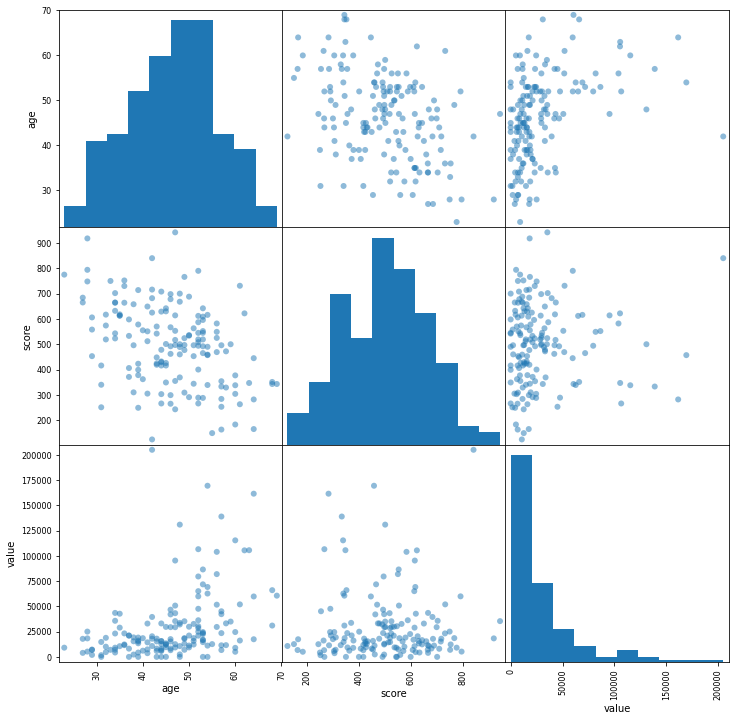

In [64]:
# Plot all numerical columns, and their interactions
pd.plotting.scatter_matrix(df[['age', 'score', 'value']], figsize=[12, 12], marker=12);  

## Application Program Interface (APIs)
- APIs are basically a way for software to talk to software
    - They are an interface into an application / website / database desgined for computers / software

Note on APIs:
- Follow API guidelines!
- These guidelines typically specify the number / rate / size of requests

## Requesting Web Pages from Python

In [66]:
# The requests module allows you to send URL requests
import requests 
from bs4 import BeautifulSoup

In [67]:
# Request data from the Github API on a particular user
page = requests.get('https://api.github.com/users/jasongfleischer')  

In [68]:
# The content we get back is a messily organized json file
page.content

b'{"login":"jasongfleischer","id":26612594,"node_id":"MDQ6VXNlcjI2NjEyNTk0","avatar_url":"https://avatars.githubusercontent.com/u/26612594?v=4","gravatar_id":"","url":"https://api.github.com/users/jasongfleischer","html_url":"https://github.com/jasongfleischer","followers_url":"https://api.github.com/users/jasongfleischer/followers","following_url":"https://api.github.com/users/jasongfleischer/following{/other_user}","gists_url":"https://api.github.com/users/jasongfleischer/gists{/gist_id}","starred_url":"https://api.github.com/users/jasongfleischer/starred{/owner}{/repo}","subscriptions_url":"https://api.github.com/users/jasongfleischer/subscriptions","organizations_url":"https://api.github.com/users/jasongfleischer/orgs","repos_url":"https://api.github.com/users/jasongfleischer/repos","events_url":"https://api.github.com/users/jasongfleischer/events{/privacy}","received_events_url":"https://api.github.com/users/jasongfleischer/received_events","type":"User","site_admin":false,"name":

In [70]:
# We can read in the json data with pandas
git_data = pd.read_json(page.content, typ='series')

In [71]:
# Check out the pandas series object full of data
git_data

login                                                    jasongfleischer
id                                                              26612594
node_id                                             MDQ6VXNlcjI2NjEyNTk0
avatar_url             https://avatars.githubusercontent.com/u/266125...
gravatar_id                                                             
url                         https://api.github.com/users/jasongfleischer
html_url                              https://github.com/jasongfleischer
followers_url          https://api.github.com/users/jasongfleischer/f...
following_url          https://api.github.com/users/jasongfleischer/f...
gists_url              https://api.github.com/users/jasongfleischer/g...
starred_url            https://api.github.com/users/jasongfleischer/s...
subscriptions_url      https://api.github.com/users/jasongfleischer/s...
organizations_url      https://api.github.com/users/jasongfleischer/orgs
repos_url              https://api.github.com/users

## Authorized Access - OAuth

Open authorization is a protocol to authorize access (of a user / application) to an API

OAuth provides a secure way to 'log-in' without using account names and passwords.

It effectively a set of keys, and passwords you can use to access APIs.

## Web Scraping vs. APIs
Web scraping and APIs are different approaches:

- APIs are an interface to interact with an application, designed for programmatic use
    - They allow systematic, controlled access to (for example) and application database
    - They typically return structured (friendly) data

- Web scraping (typically) involves navigating through the internet, programmatically following an architecture built for humans
    - This can be hard to systematize, being dependent on the idiosyncracies of a web page, at the time you request it
    - This typically returns relatively unstructed data
    - This entails much more wrangling of the data


## Where to Find Data?

* [Awesome Public Datasets](https://github.com/awesomedata/awesome-public-datasets/blob/master/README.rst)
* [Data.gov](https://catalog.data.gov/dataset)
* [Data Is Plural](https://docs.google.com/spreadsheets/d/1wZhPLMCHKJvwOkP4juclhjFgqIY8fQFMemwKL2c64vk/edit#gid=0)
* [UCSD Datasets](https://ucsd.libguides.com/data-statistics/home)
* [Datasets | Deep Learning](http://deeplearning.net/datasets/)
* [Stanford | Social Science Data Collection](https://data.stanford.edu/)
* [Eviction Lab (email required)](https://evictionlab.org/get-the-data/)
* [San Diego Data](https://data.sandiego.gov/)
* [US Census](https://www.census.gov/)
* [Open Climate Data](http://openclimatedata.net/)
* [Data and Story Library](https://dasl.datadescription.com/datafiles/)
* [UCSD behavioral mobile data](http://extrasensory.ucsd.edu/)
* [Kaggle](https://www.kaggle.com/)
* [FiveThirtyEight](https://data.fivethirtyeight.com/)
* [data.world](https://data.world/)
* [Free Datasets - R and Data Mining ](http://www.rdatamining.com/resources/data)
* [Data Sources for Cool Data Science Projects](https://blog.thedataincubator.com/2014/10/data-sources-for-cool-data-science-projects-part-1/)

## Notes on Working with Data

### Data Science is Ad-Hoc
- It is part of the job description to put things together that were not designed to go together.
- We do not have universal solution, but haphazard, idiosyncratic systems, for data collection, storage and analysis.
- Data is everywhere. But relatively little of it was collected as *data*

### Data Collection, Curation, and Storage are Difficult
- it can be difficult to choose broadly useful standards
- Take time to think about your data, and how you will load, store, organize, and save it

### Data is Inherently Noisy
- We live in a mesy, noisy world, with nessy, noisy, people, using messy, noisy instruments.
- There is no perfect data
    - There is better / or worse data, given the context

### Different Objectives
- Humans and computers are different
- We interact with *'data'* in different ways
- This underlies many aspects of data wrangling
    - the 'friendliness' of data types / files
    - The difference between web scraping and APIs
    - A disconnect between data in the real world, and data we want to use

### So... What to do?
- Think about how your data are stored & its structure?
- Look at your data before you anayze it
    - Are there missing values?
    - Outlier values?
- Is your data trustworthy?
    - Source?
    - How was it generated?

### Specific Recommendations
- Prioritize using well structed, common, open file types
    - Take advantage of exisitng tools to deal with these files (numpy, pandas, etc.)

- Look into, and then follow, common conventions
    - Minimize custom objects, workflows, and data files
- Look for APIs. Ask if they are available.
    - Acknowledge that web scrapping and/or wrangling unstructed data are complex / long tasks

- Think about data flow from the beginning. Organize your data pipeline, consider the 'wrangling' aspects throughout
    - Set yourself up with well organized, labelled approach to your data
    - Think about when and how you might want/need to save out intermediate results